In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image

In [2]:
im_size = (243,320)
path = "data/yalefaces/"
data_path = dict()
p = list(os.listdir(path))

In [3]:
for i in range(len(p)):
    if p[i].split('.')[-1] != 'gif' and p[i].split('.')[-1] != 'txt':
        data_path[i] = os.path.join(path, p[i])
data_path = pd.DataFrame(list(data_path.values()),index=range(1,len(data_path)+1),columns=['path'])
del p

In [4]:
def next_image():
    for i in data_path['path']:
        img = np.array(plt.imread(i), dtype='float16')
        img /= 255.0
        yield img.ravel()

In [5]:
images = []
for i in next_image():
    images.append(i)
images = np.array(images)
del i

In [6]:
avg_ims = images - images.mean(axis=0)
# avg_ims.shape = avg_ims.shape[::-1]

In [7]:
avg_ims.shape

(164, 77760)

In [8]:
cov_ims = np.cov(avg_ims)

In [9]:
cov_ims.shape

(164, 164)

In [10]:
eig_vals, eig_vecs = np.linalg.eigh(cov_ims)

In [11]:
eig_vals.shape

(164,)

In [12]:
eig_vecs.shape

(164, 164)

In [13]:
faces = eig_vecs @ avg_ims

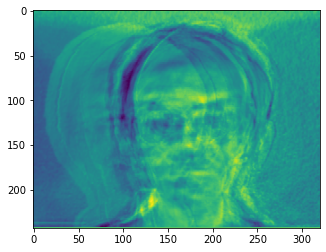

In [14]:
plt.imshow(faces[0].reshape(im_size))